In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

## 전처리

In [280]:
bell_df = pd.read_excel('서울시 자치구별 안전비상벨.xlsx')
bell_df.info()  # 19153건의 안전비상벨 데이터가 있다 이거지? 결측값 없이.
bell_df.head()

C:\Users\qooqp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19153 entries, 0 to 19152
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   번호         19153 non-null  int64  
 1   안전비상벨관리번호  19153 non-null  object 
 2   설치목적       19153 non-null  object 
 3   설치장소유형     19153 non-null  object 
 4   설치위치       19153 non-null  object 
 5   소재지도로명주소   17050 non-null  object 
 6   소재지지번주소    14591 non-null  object 
 7   WGS84위도    19153 non-null  float64
 8   WGS84경도    19153 non-null  float64
 9   연계방식       19153 non-null  object 
 10  경찰연계유무     19153 non-null  object 
 11  경비업체연계유무   19153 non-null  object 
 12  관리사무소연계유무  19153 non-null  object 
 13  부가기능       5576 non-null   object 
 14  안전비상벨설치연도  19153 non-null  int64  
 15  최종점검일자     19153 non-null  object 
 16  최종점검결과구분   19153 non-null  object 
 17  관리기관명      19153 non-null  object 
 18  관리기관전화번호   19153 non-null  object 
 19  데이터기준일자    19153 non-null  object 
dtypes: flo

,번호,안전비상벨관리번호,설치목적,설치장소유형,설치위치,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도,연계방식,경찰연계유무,경비업체연계유무,관리사무소연계유무,부가기능,안전비상벨설치연도,최종점검일자,최종점검결과구분,관리기관명,관리기관전화번호,데이터기준일자
0,1,건물-6호,방범용,건물,서초동 1549-4,"서울특별시 서초구 반포대로22길 39, 우신1549빌딩 (서초동)",서울특별시 서초구 서초동 1549-4 우신1549빌딩,37.48990,127.01067,미연계,N,N,N,NaN,2019,2019-07-02,Y,서초구청,02-2155-6830,2020-10-30
1,2,건물-5호,방범용,건물,방배동 426-10,서울특별시 서초구 방배천로16길 11-5 (방배동),서울특별시 서초구 방배동 437-10,37.48242,126.98335,미연계,N,N,N,NaN,2019,2019-07-09,Y,서초구청,02-2155-6830,2020-10-30
2,3,건물-7호,방범용,건물,서초동 1481-22,서울특별시 서초구 반포대로5길 54 (서초동),서울특별시 서초구 서초동 1481-22,37.48168,127.00865,미연계,N,N,N,NaN,2019,2019-09-20,Y,서초구청,02-2155-6830,2020-10-30
3,4,건물-9호,방범용,건물,서초동 1481-1,"서울특별시 서초구 반포대로9길 57, 서초그레이스빌 (서초동)",서울특별시 서초구 서초동 1481-1 서초그레이스빌,37.48287,127.00912,미연계,N,N,N,NaN,2019,2019-10-31,Y,서초구청,02-2155-6830,2020-10-30
4,5,건물-10호,방범용,건물,서초동 1481-21,"서울특별시 서초구 반포대로9길 55, 힐하우스 (서초동)",서울특별시 서초구 서초동 1481-21 힐하우스,37.48275,127.00854,미연계,N,N,N,NaN,2019,2019-10-31,Y,서초구청,02-2155-6830,2020-10-30


In [281]:
data = pd.DataFrame(bell_df.groupby(['관리기관명', '안전비상벨설치연도'])['안전비상벨관리번호'].count())  # 관리기관과 설치연도로 묶어서 개수 파악
data = data.reset_index(level=1)
data = data.rename(columns={'안전비상벨관리번호':'안전비상벨설치수'})  # 축이름 설정
data

,안전비상벨설치연도,안전비상벨설치수
관리기관명,,
강동구청,2007,3
강동구청,2008,1
강동구청,2009,25
강동구청,2010,42
강동구청,2011,7
...,...,...
은평구청 자원순환과,2017,8
종로구청,2013,2
종로구청,2016,42


In [282]:
# 관리기관명에 자치구가 들어가는점을 이용해 자치구와 관리기관명 맵핑

gu = ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', 
    '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', 
    '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'
]
from collections import defaultdict
d = defaultdict(list)

for i in gu:
    for j in data.index.unique():
        if i in j:
            d[i].append(j)
d

defaultdict(list,
            {'종로구': ['종로구청', '종로구청 청소행정과'],
             '중구': ['서울특별시 중구청'],
             '용산구': ['서울특별시 용산구청'],
             '성동구': ['서울특별시 성동구청'],
             '광진구': ['광진구청'],
             '동대문구': ['동대문구청 스마트도시과', '동대문구청 정원도시과', '서울특별시 동대문구청 청소행정과'],
             '중랑구': ['서울특별시 중랑구시설관리공단', '서울특별시 중랑구청', '서울특별시 중랑구청 민원여권과'],
             '성북구': ['서울시성북구청공원녹지과',
              '서울시성북구청교통지도과',
              '서울시성북구청도시안전과',
              '서울시성북구청청소행정과'],
             '강북구': ['강북구청 공원녹지과'],
             '노원구': ['노원구청'],
             '은평구': ['서울특별시 은평구청', '은평구청 공원녹지과', '은평구청 자원순환과'],
             '서대문구': ['서대문구청 교통행정과',
              '서대문구청 스마트정보과',
              '서대문구청 자치행정과',
              '서대문구청 주차교통과',
              '서대문구청 치수과',
              '서대문구청 푸른도시과'],
             '마포구': ['서울특별시 마포구청'],
             '양천구': ['서울특별시 양천구청'],
             '강서구': ['서울특별시 강서구청'],
             '구로구': ['서울특별시 구로구청'],
             '금천구': ['금천구 U-통합운영센터'],
             '영등포구': ['서울특별시 영

In [283]:
# 관리기관명을 맵핑된 값으로 바꿔줌
for i, j in d.items():
    for k in j:
        data.rename(index={k:i}, inplace=True)

    
data

,안전비상벨설치연도,안전비상벨설치수
관리기관명,,
강동구,2007,3
강동구,2008,1
강동구,2009,25
강동구,2010,42
강동구,2011,7
...,...,...
은평구,2017,8
종로구,2013,2
종로구,2016,42


In [284]:
# 이름바꿔줬는데 연도가 겹치는게 있네?
print(len(data.loc['강동구','안전비상벨설치연도']))
len(data.loc['강동구','안전비상벨설치연도'].unique())

21


15

In [285]:
# 같은 연도에 설치된거 합쳐줌
data1 = data.groupby(['관리기관명','안전비상벨설치연도']).sum().reset_index(level=1) 
len(data1.loc['강동구','안전비상벨설치연도'])

15

In [286]:
print(data1.index.unique())  # 도봉구가 없네..? 엑셀열어본 결과 도봉구는 안전비상벨을 하나도 설치 안함
data1

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '동대문구',
       '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구',
       '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='관리기관명')


,안전비상벨설치연도,안전비상벨설치수
관리기관명,,
강남구,2012,16
강남구,2013,7
강남구,2014,162
강남구,2015,183
강남구,2016,237
...,...,...
중랑구,2019,72
중랑구,2020,105
중랑구,2021,126


In [287]:
# 빈 DF
temp = pd.DataFrame(index=data.index.unique(), columns=sorted(data['안전비상벨설치연도'].unique()))


for i in gu:
    try:  
        data2 = data1.loc[i]  # i가 도봉구이면 오류발생하니 방지해주기
    except:
        continue 
    for j in range(len(data2['안전비상벨설치연도'])):
        temp.loc[i, data2['안전비상벨설치연도'][j]] = data2['안전비상벨설치수'][j]  # 빈 DF에 자치구와 연도 맞춰서 값 넣기


C:\Users\qooqp\AppData\Local\Temp\ipykernel_4840\4203414358.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp.loc[i, data2['안전비상벨설치연도'][j]] = data2['안전비상벨설치수'][j]  # 빈 DF에 자치구와 연도 맞춰서 값 넣기


In [288]:
temp

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
관리기관명,,,,,,,,,,,,,,,,,,,,,
강동구,NaN,NaN,NaN,3,1,25,42,7,2,59,...,65,110,229,192,117,89,65,NaN,NaN,NaN
강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4,17,1,NaN,NaN,NaN,NaN,NaN,NaN
관악구,NaN,NaN,3,NaN,3,30,46,91,37,131,...,136,55,54,100,93,62,117,49,32,NaN
광진구,NaN,NaN,NaN,NaN,4,NaN,1,NaN,28,76,...,65,34,200,76,51,49,174,53,NaN,NaN
금천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,25,217,256,70,89,8,42,NaN,NaN
노원구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,61,NaN,NaN,NaN,1,1,1,NaN
동대문구,NaN,2,26,20,51,55,85,59,42,11,...,32,104,37,63,64,66,37,69,121,NaN
서대문구,NaN,20,50,16,10,36,45,39,47,37,...,22,27,38,25,30,48,20,53,48,6
성북구,NaN,NaN,19,31,NaN,16,77,35,34,101,...,84,166,81,177,111,3,NaN,NaN,NaN,NaN


In [289]:
# 비상벨 수 = 누적설치수
temp = temp.fillna(0)
display(temp)
temp = temp.cumsum(axis=1)
temp

C:\Users\qooqp\AppData\Local\Temp\ipykernel_4840\2045716702.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.fillna(0)


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
관리기관명,,,,,,,,,,,,,,,,,,,,,
강동구,0,0,0,3,1,25,42,7,2,59,...,65,110,229,192,117,89,65,0,0,0
강북구,0,0,0,0,0,0,0,0,0,0,...,0,4,17,1,0,0,0,0,0,0
관악구,0,0,3,0,3,30,46,91,37,131,...,136,55,54,100,93,62,117,49,32,0
광진구,0,0,0,0,4,0,1,0,28,76,...,65,34,200,76,51,49,174,53,0,0
금천구,0,0,0,0,0,0,0,0,0,0,...,2,25,217,256,70,89,8,42,0,0
노원구,0,0,0,0,0,0,0,0,0,0,...,0,0,61,0,0,0,1,1,1,0
동대문구,0,2,26,20,51,55,85,59,42,11,...,32,104,37,63,64,66,37,69,121,0
서대문구,0,20,50,16,10,36,45,39,47,37,...,22,27,38,25,30,48,20,53,48,6
성북구,0,0,19,31,0,16,77,35,34,101,...,84,166,81,177,111,3,0,0,0,0


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
관리기관명,,,,,,,,,,,,,,,,,,,,,
강동구,0,0,0,3,4,29,71,78,80,139,...,235,345,574,766,883,972,1037,1037,1037,1037
강북구,0,0,0,0,0,0,0,0,0,0,...,0,4,21,22,22,22,22,22,22,22
관악구,0,0,3,3,6,36,82,173,210,341,...,515,570,624,724,817,879,996,1045,1077,1077
광진구,0,0,0,0,4,4,5,5,33,109,...,290,324,524,600,651,700,874,927,927,927
금천구,0,0,0,0,0,0,0,0,0,0,...,2,27,244,500,570,659,667,709,709,709
노원구,0,0,0,0,0,0,0,0,0,0,...,0,0,61,61,61,61,62,63,64,64
동대문구,0,2,28,48,99,154,239,298,340,351,...,400,504,541,604,668,734,771,840,961,961
서대문구,0,20,70,86,96,132,177,216,263,300,...,342,369,407,432,462,510,530,583,631,637
성북구,0,0,19,50,50,66,143,178,212,313,...,504,670,751,928,1039,1042,1042,1042,1042,1042


## bell_df 완성

In [290]:
bell_df = temp.iloc[:,-6:-2]
bell_df = bell_df.rename_axis(mapper='안전비상벨수',axis=1)
bell_df.loc['도봉구'] = 0
bell_df.columns = columns = ['2019', '2020', '2021', '2022']
bell_df

,2019,2020,2021,2022
관리기관명,,,,
강동구,883,972,1037,1037
강북구,22,22,22,22
관악구,817,879,996,1045
광진구,651,700,874,927
금천구,570,659,667,709
노원구,61,61,62,63
동대문구,668,734,771,840
서대문구,462,510,530,583
성북구,1039,1042,1042,1042


## 자치구별 안전비상벨수

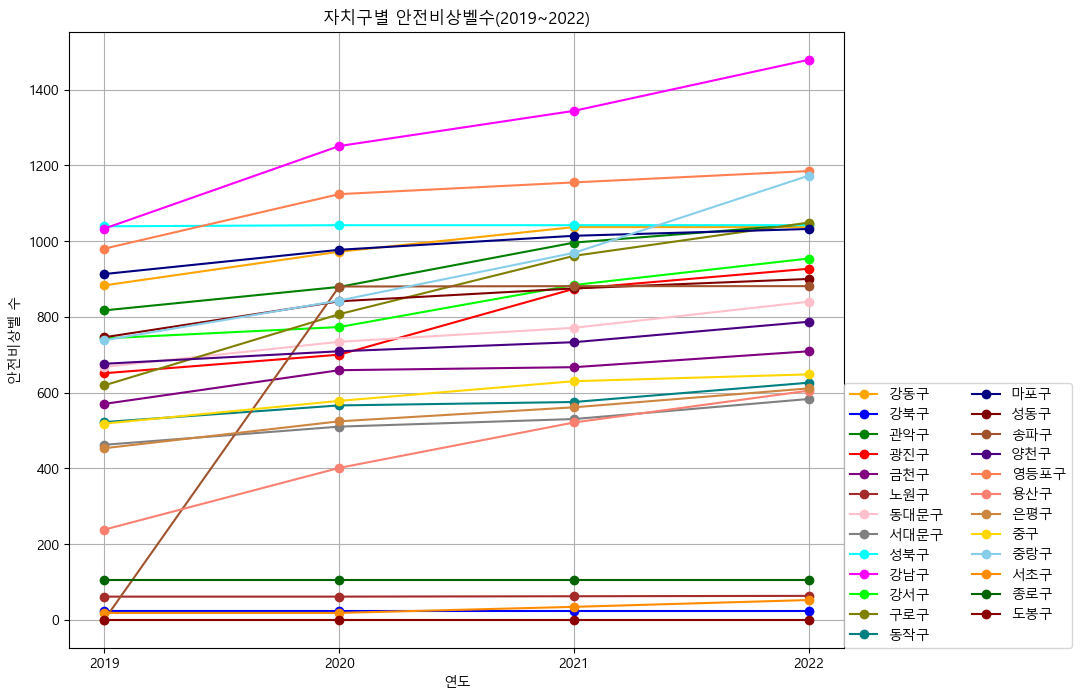

In [291]:
colors = ['orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta',
          'lime', 'olive', 'teal', 'navy', 'maroon', 'sienna', 'indigo', 'coral', 'salmon',
          'peru', 'gold', 'skyblue', 'darkorange', 'darkgreen', 'darkred']
color_index = 0
# 그래프 사이즈 설정
plt.figure(figsize=(10, 8))

# DF의 인덱스와 값으로 라인그래프
for index, row in bell_df.iterrows():
    plt.plot(bell_df.columns, row, marker='o', label=index, color=colors[color_index])
    color_index += 1

plt.title('자치구별 안전비상벨수(2019~2022)')
plt.xlabel('연도')
plt.ylabel('안전비상벨 수')
plt.legend(loc=(1,0), ncol=2)
plt.grid(True)

plt.show()

## 19년 대비 22년 자치구별 안전비상벨 수

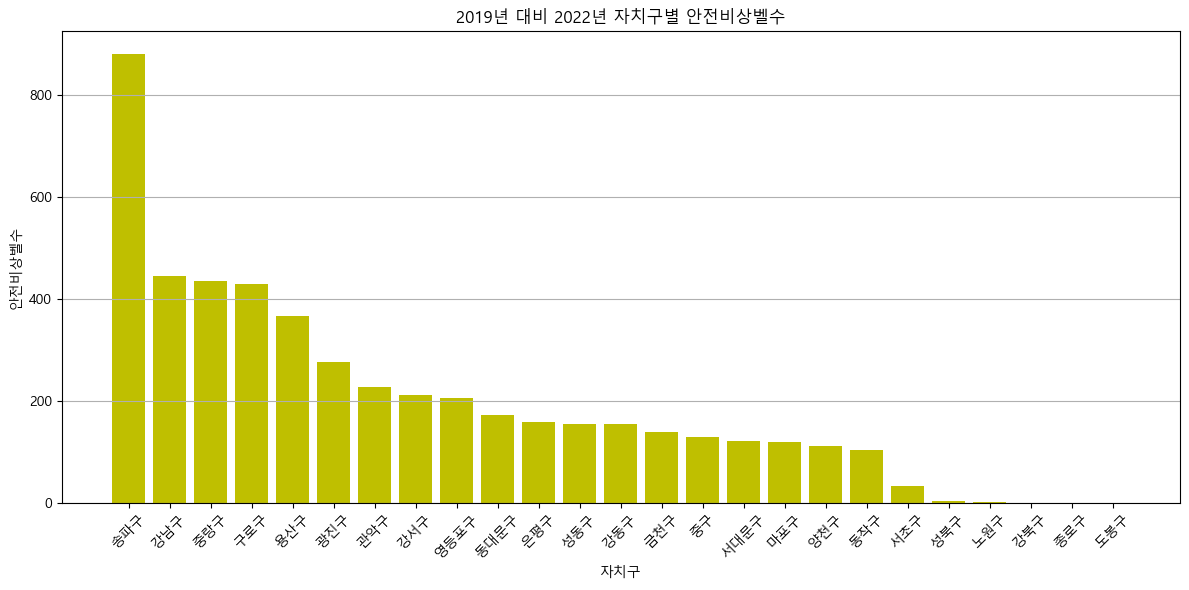

In [292]:
def delta_graph(df, color):
    df['변화량'] = (df['2022'] - df['2019'])

    df_sorted = df.sort_values(by='변화량', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted.index, df_sorted['변화량'], color=color)
    plt.title('2019년 대비 2022년 자치구별 안전비상벨수')
    plt.xlabel('자치구')
    plt.ylabel('안전비상벨수')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
    df.drop(['변화량'], axis=1, inplace=True)

delta_graph(bell_df, 'y')

In [293]:
colors = ['red', 'red', 'red', 'blue', 'blue', 'blue', 'blue']

## 19년대비 22년 6개구 안전비상벨수

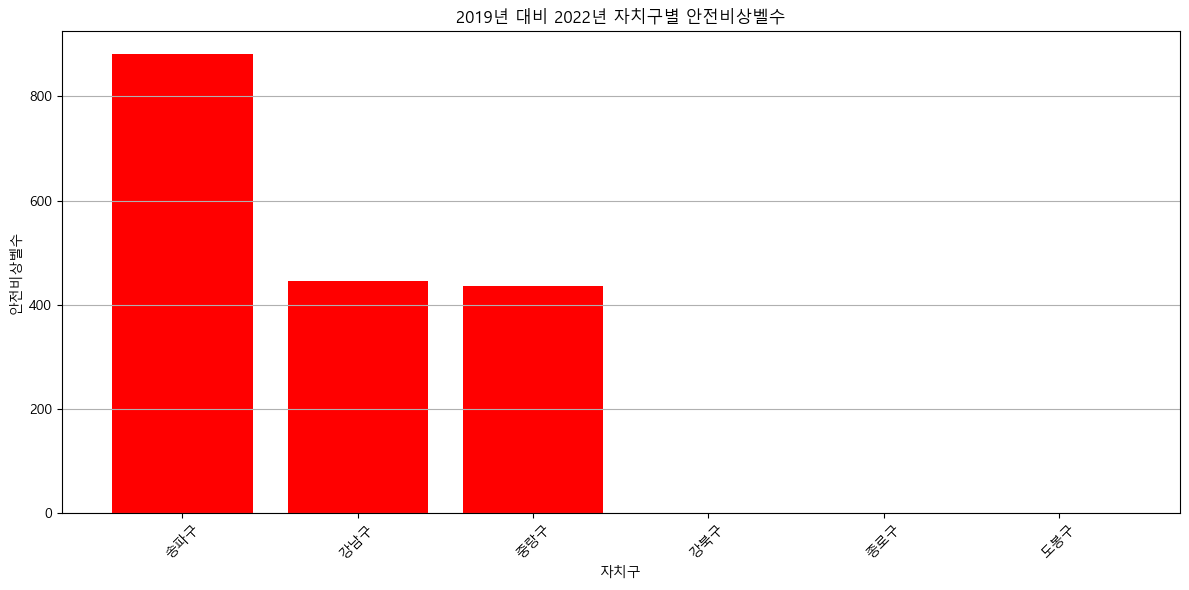

In [294]:
target_bell_df = bell_df.loc[['송파구', '강남구', '중랑구', '강북구', '종로구', '도봉구']]

delta_graph(target_bell_df, 'r')

